In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df=pd.read_excel("Data_Python_ST3/BT1/Online Retail.xlsx")

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[541909 rows x 8 columns]>

In [ ]:
print(df.dtypes)
print(df.shape)
df.head()

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object
(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.drop_duplicates(inplace=True)
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0


In [ ]:
df.describe().T.style

,count,mean,min,25%,50%,75%,max,std
Quantity,536641.000000,9.620029,-80995.000000,1.000000,3.000000,10.000000,80995.000000,219.130156
InvoiceDate,536641,2011-07-04 08:57:06.087421952,2010-12-01 08:26:00,2011-03-28 10:52:00,2011-07-19 14:04:00,2011-10-18 17:05:00,2011-12-09 12:50:00,nan
UnitPrice,536641.000000,4.632656,-11062.060000,1.250000,2.080000,4.130000,38970.000000,97.233118
CustomerID,401604.000000,15281.160818,12346.000000,13939.000000,15145.000000,16784.000000,18287.000000,1714.006089


/tmp/ipython-input-2171527892.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=top_10_countries.values, y=top_10_countries.index, palette='viridis')
/tmp/ipython-input-2171527892.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=top_10_products.values, y=top_10_products.index, palette='plasma')
/tmp/ipython-input-2171527892.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df_clean.set_index('InvoiceDate').resample('M')['TotalPrice'].sum()


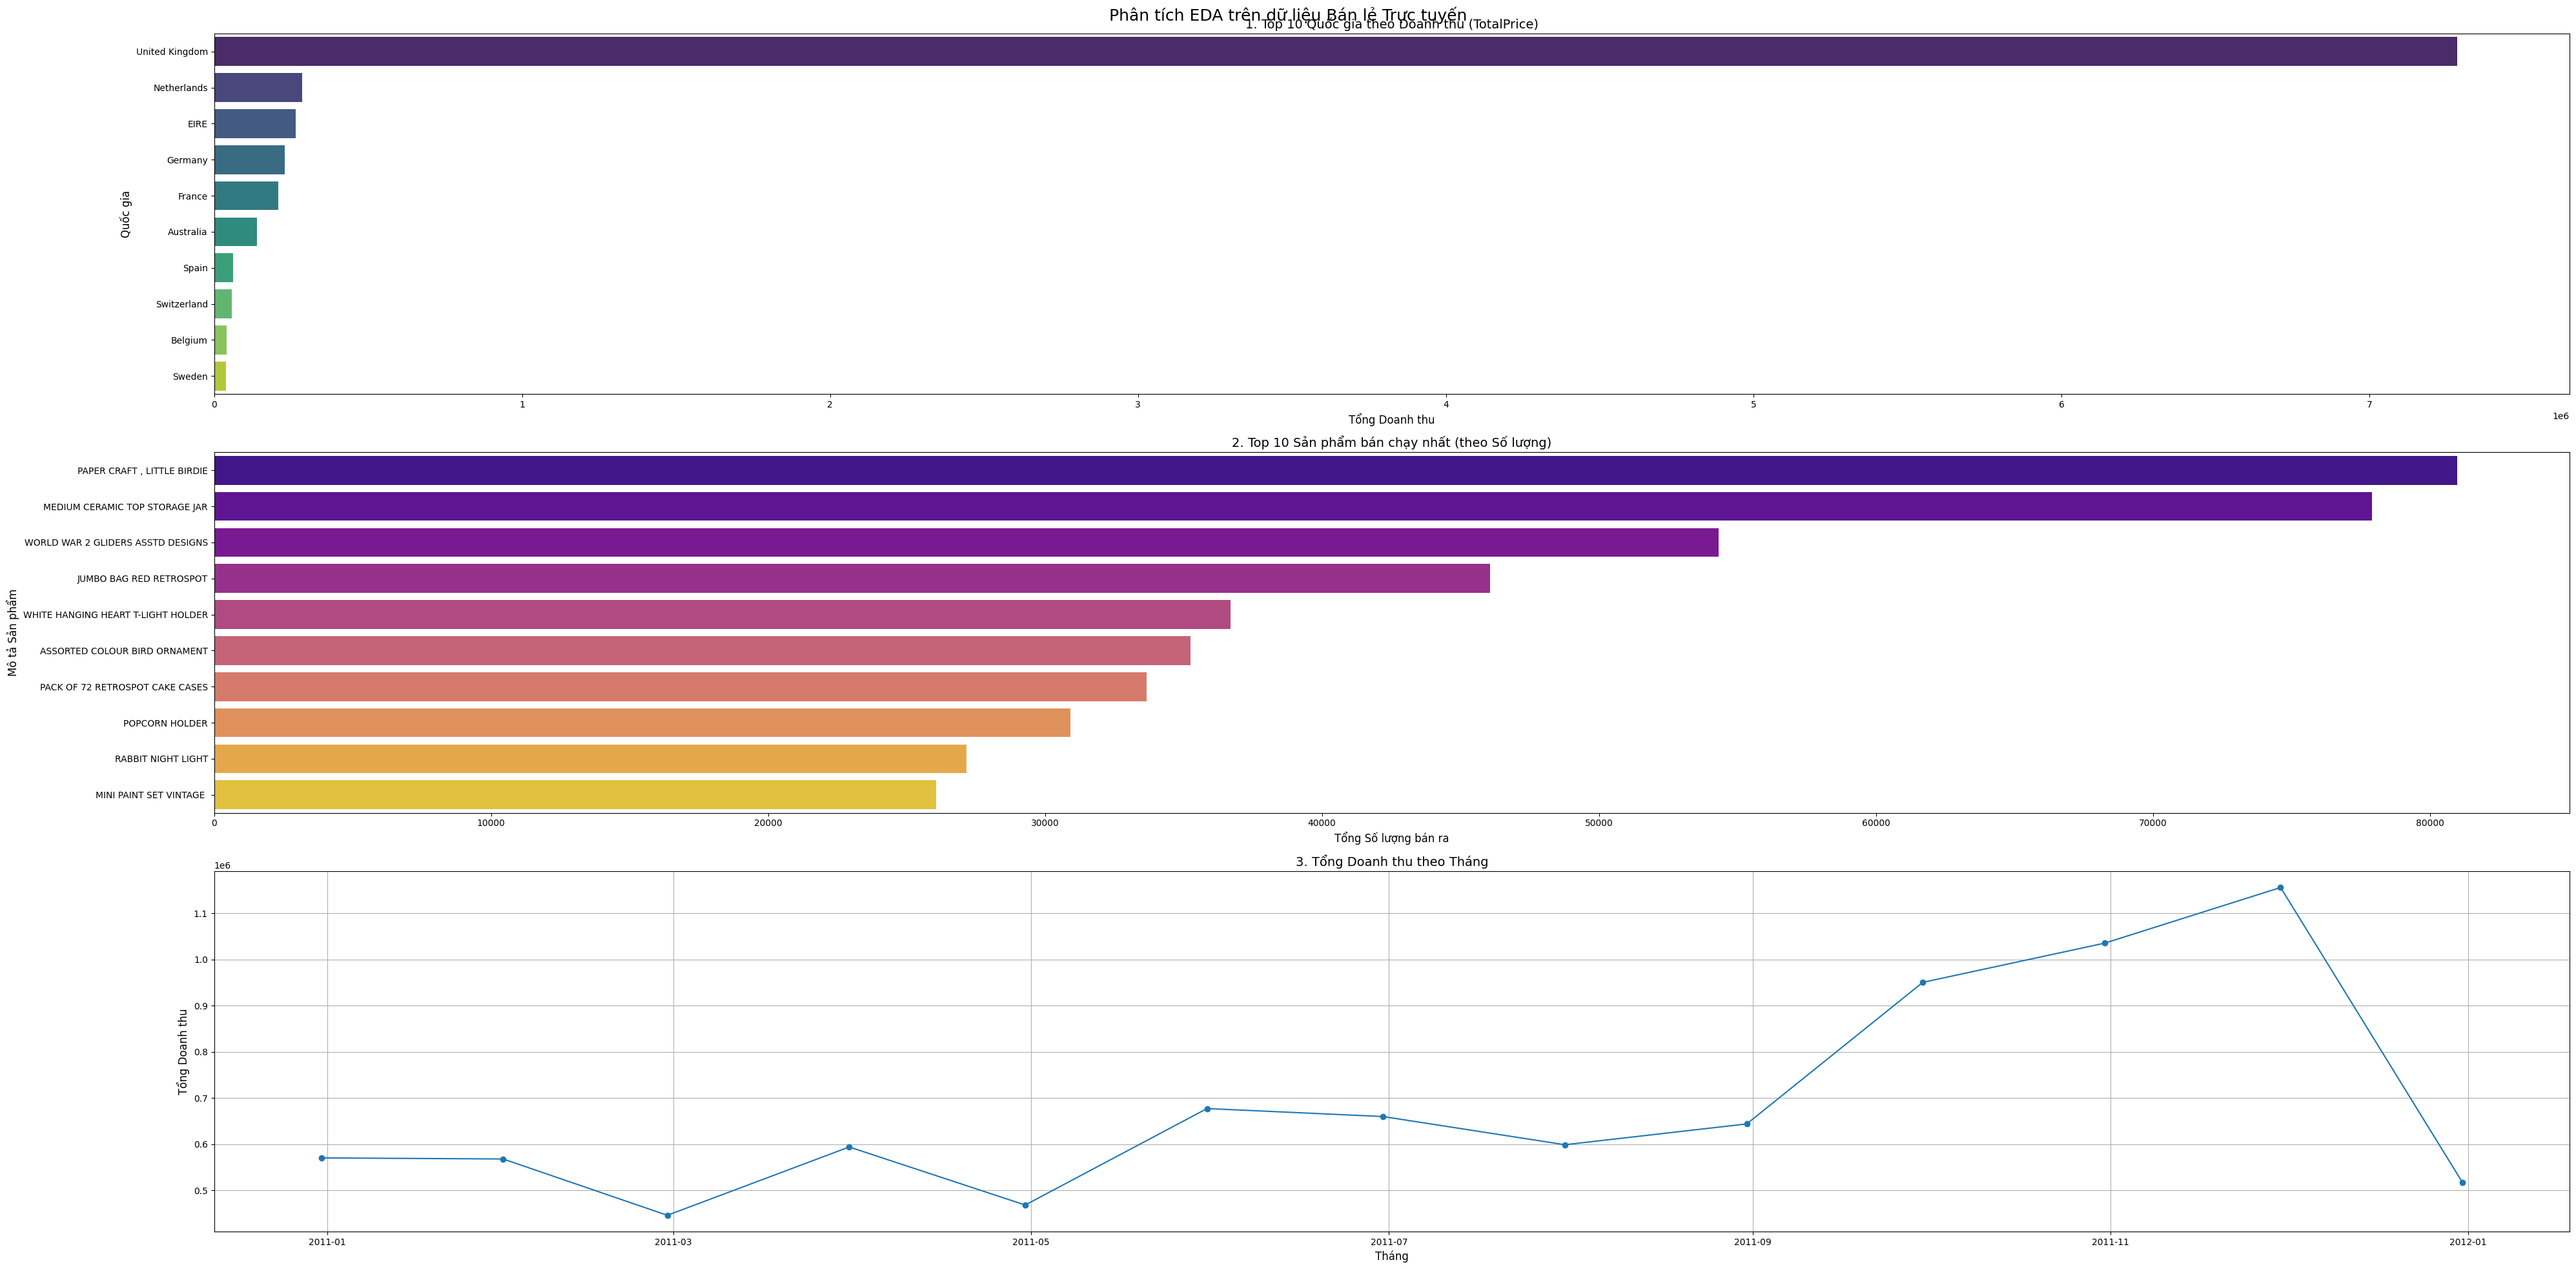

In [ ]:
#Làm sạch dữ liệu
# Xóa các hàng không có CustomerID
df_clean = df.dropna(subset=['CustomerID'])

# Chỉ giữ các giao dịch mua (loại bỏ đơn hàng hủy/trả)
df_clean = df_clean[df_clean['Quantity'] > 0].copy()

# Chuyển đổi cột ngày tháng
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# Tạo cột TotalPrice
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

#Thiết lập khung vẽ
fig, axes = plt.subplots(3, 1, figsize=(40, 20))
fig.suptitle('Phân tích EDA trên dữ liệu Bán lẻ Trực tuyến', fontsize=18)

#Vẽ các biểu đồ

# Biểu đồ 1: Top 10 quốc gia có doanh thu cao nhất
country_revenue = df_clean.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
top_10_countries = country_revenue.head(10)

sns.barplot(ax=axes[0], x=top_10_countries.values, y=top_10_countries.index, palette='viridis')
axes[0].set_title('1. Top 10 Quốc gia theo Doanh thu (TotalPrice)', fontsize=14)
axes[0].set_xlabel('Tổng Doanh thu', fontsize=12)
axes[0].set_ylabel('Quốc gia', fontsize=12)

# Biểu đồ 2: Top 10 sản phẩm bán chạy nhất
product_quantity = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
top_10_products = product_quantity.head(10)

sns.barplot(ax=axes[1], x=top_10_products.values, y=top_10_products.index, palette='plasma')
axes[1].set_title('2. Top 10 Sản phẩm bán chạy nhất (theo Số lượng)', fontsize=14)
axes[1].set_xlabel('Tổng Số lượng bán ra', fontsize=12)
axes[1].set_ylabel('Mô tả Sản phẩm', fontsize=12)

# Biểu đồ 3: Doanh thu theo thời gian (theo tháng)
# 'M' là mã của 'Month end' (cuối tháng)
monthly_revenue = df_clean.set_index('InvoiceDate').resample('M')['TotalPrice'].sum()

axes[2].plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-')
axes[2].set_title('3. Tổng Doanh thu theo Tháng', fontsize=14)
axes[2].set_xlabel('Tháng', fontsize=12)
axes[2].set_ylabel('Tổng Doanh thu', fontsize=12)
axes[2].grid(True)

#Hiển thị
plt.tight_layout()
plt.show()